In [10]:
from model import Fuzzification, InferenceEngine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titleweight'] = 'bold'

<Figure size 432x288 with 0 Axes>

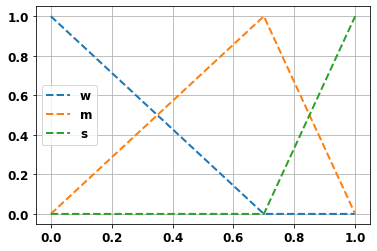

<Figure size 432x288 with 0 Axes>

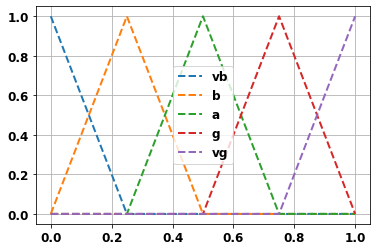

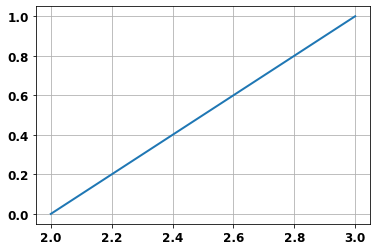

In [11]:
#construct linguistic value databases
wms = Fuzzification.wms()
vbbagvg = Fuzzification.vbbagvg()

plt.figure(); wms.plot(linestyle='--');plt.grid();
plt.figure(); vbbagvg.plot(linestyle='--');plt.grid();

domain=np.arange(2,
                 3+0.01,
                 0.01)

# x = Fuzzification.trapezoid(z=domain,
#                             c_l=domain.min(),tc=domain.min(),Tc=domain.min(),c_u=domain.max()) #lower is better
# plt.figure()
# plt.plot(domain,x);plt.grid()

x = Fuzzification.trapezoid(z=domain,
                            c_l=domain.min(),tc=domain.max(),Tc=domain.max(),c_u=domain.max()) #higher is better
plt.figure()
plt.plot(domain,x);plt.grid()

# WEALTH -Status

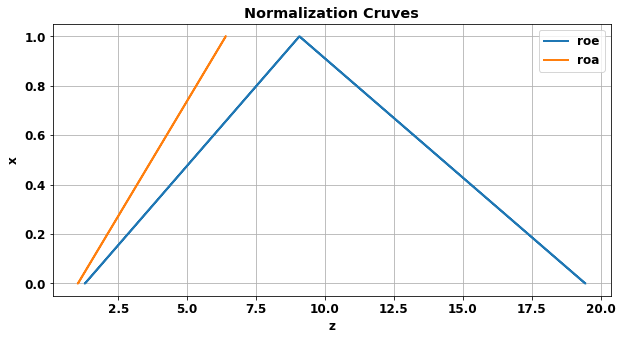

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 26 17:34:17 2020

@author: m4rz910
"""

from model import Fuzzification, InferenceEngine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titleweight'] = 'bold'

#construct linguistic value databases
wms = Fuzzification.wms()
vbbagvg = Fuzzification.vbbagvg()


######################################## WEALTH- STATUS #############################################
#START
wealth = pd.read_excel('./databases/indicator_db.xlsx', sheet_name='wealth').round(Fuzzification.nd)

#NORMALIZATION
curves = []
indicators = ['roe','roa'] #CHANGE ME 
for basic_indicator in indicators: 
    assert wealth[wealth['basic']==basic_indicator].shape[1] == 9 , 'Warning, not expected shape' #check,sensitve to number of basic indicators, CHANGE ME
    basic_df = wealth[wealth['basic']==basic_indicator]
    iv = basic_df['intensive_value']
    
    discourse = np.arange(iv.min(),iv.max()+Fuzzification.dx,Fuzzification.dx).round(Fuzzification.nd)
    
    if basic_indicator == 'roe': #MIDDLE IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z= discourse,
                                    c_l=iv.min(),
                                    tc=iv.mean(),
                                    Tc=iv.mean(),
                                    c_u=iv.max());
        
    if basic_indicator == 'roa': #HIGHER IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z=discourse,
                                    c_l=iv.min(),
                                    tc=iv.max(),
                                    Tc=iv.max(),
                                    c_u=iv.max())
        
    ncurve = pd.Series(data=x.round(Fuzzification.nd),
                        index=discourse.round(Fuzzification.nd),
                        name=basic_indicator)
    curves.append(ncurve)

plt.figure(figsize=(10,5));plt.title('Normalization Cruves');
for curve in curves:
    curve.plot();
plt.grid();plt.xlabel('z');plt.ylabel('x'); plt.legend(indicators);
    
#FUZZIFICATION
frames = []
for curve in curves: #order of curves matters
    df_base = wealth[wealth['basic']==curve.name].drop(['raw_value','raw_value_units','intensive_units','source'],axis='columns').reset_index(drop=True) #reset index so that it concats properly
    z = df_base['intensive_value'].values
    x = curve.loc[z] # pass through normalization curve
    wms_v = wms.loc[x.values].reset_index(); #reset index to make concat work
    df_out = pd.concat([df_base,wms_v],axis='columns')
    assert df_base.shape[0] == df_out.shape[0], 'different amount of rows, error'
    frames.append(df_out)
wealth = pd.concat(frames).reset_index(drop=True)
wealth

#INFERENCE
frames2=[]
for company in wealth['company'].unique():
    frames = []
    for year in wealth['year'].unique():
        company_year = wealth[(wealth['company'] == company) &
                              (wealth['year'] == year)]

        basic_indicators = [company_year[company_year['basic']=='roe'].iloc[0], #CHANGE ME converted to series
                            company_year[company_year['basic']=='roa'].iloc[0]]

        #apply inference engine
        frames.append(InferenceEngine.b2__s(basic_indicators)) #CHANGE ME
    frames2.append(pd.concat(frames,axis='columns').T)
df_status = pd.concat(frames2).reset_index(drop=True)

In [28]:
df_status

,secondary,company,year,vb,b,a,g,vg
0,status,nee,2018,0,0,1,0,0
1,status,nee,2017,0,0.53,0.45,0.02,0
2,status,nee,2016,0,0.39,0.57,0.04,0
3,status,nee,2015,0,0.39,0.61,0,0
4,status,nee,2014,0.01,0.41,0.58,0,0
5,status,duk,2018,0.09,0.72,0.19,0,0
6,status,duk,2017,0,0.51,0.4,0.08,0
7,status,duk,2016,0.23,0.65,0.11,0,0
8,status,duk,2015,0,0.56,0.39,0.05,0
9,status,duk,2014,0.34,0.57,0.08,0,0


# WEALTH - response

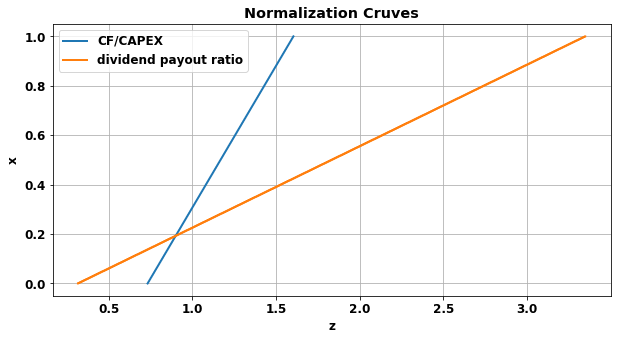

In [13]:
####################################### WEALTH- RESPONSE #############################################
wealth = pd.read_excel('./databases/indicator_db.xlsx', sheet_name='wealth').round(Fuzzification.nd)

#NORMALIZATION
indicators = ['CF/CAPEX','dividend payout ratio'] #CHANGE ME 
curves = []
for basic_indicator in indicators: 
    assert wealth[wealth['basic']==basic_indicator].shape[1] == 9 , 'Warning, not expected shape' #check,sensitve to number of basic indicators, CHANGE ME
    basic_df = wealth[wealth['basic']==basic_indicator]
    iv = basic_df['intensive_value']
   
    discourse = np.arange(iv.min(),iv.max()+Fuzzification.dx,Fuzzification.dx).round(Fuzzification.nd)
    
    if basic_indicator == 'CF/CAPEX': #HIGHER IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z=discourse,
                                    c_l=iv.min(),
                                    tc=iv.max(),
                                    Tc=iv.max(),
                                    c_u=iv.max())
        
    if basic_indicator == 'dividend payout ratio': #HIGHER IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z=discourse,
                                    c_l=iv.min(),
                                    tc=iv.max(),
                                    Tc=iv.max(),
                                    c_u=iv.max())
        
    ncurve = pd.Series(data=x.round(Fuzzification.nd),
                       index=discourse.round(Fuzzification.nd),
                       name=basic_indicator)
    curves.append(ncurve)

#plotting normalization curve
plt.figure(figsize=(10,5));plt.title('Normalization Cruves');
for curve in curves:
    curve.plot();
plt.grid();plt.xlabel('z');plt.ylabel('x'); plt.legend(indicators);

#FUZZIFICATION
frames = []
for curve in curves: #order of curves matters
    df_base = wealth[wealth['basic']==curve.name].drop(['raw_value','raw_value_units','intensive_units','source'],axis='columns').reset_index(drop=True) #reset index so that it concats properly
    z = df_base['intensive_value'].values
    x = curve.loc[z] # pass through normalization curve
    wms_v = wms.loc[x.values].reset_index(); #reset index to make concat work
    df_out = pd.concat([df_base,wms_v],axis='columns')
    assert df_base.shape[0] == df_out.shape[0], 'different amount of rows, error'
    frames.append(df_out)
wealth = pd.concat(frames).reset_index(drop=True)

#INFERENCE
frames2=[]
for company in wealth['company'].unique():
    frames = []
    for year in wealth['year'].unique():
        company_year = wealth[(wealth['company'] == company) &
                              (wealth['year'] == year)]

        basic_indicators = [company_year[company_year['basic']=='CF/CAPEX'].iloc[0], #CHANGE ME converted to series
                            company_year[company_year['basic']=='dividend payout ratio'].iloc[0]]

        #apply inference engine
        frames.append(InferenceEngine.b2__s(basic_indicators)) #CHANGE ME
    frames2.append(pd.concat(frames,axis='columns').T)
df_response = pd.concat(frames2).reset_index(drop=True)

In [29]:
df_response

,secondary,company,year,vb,b,a,g,vg
0,response,nee,2018,0.4,0.6,0,0,0
1,response,nee,2017,0.25,0.73,0.01,0,0
2,response,nee,2016,0,0.89,0.04,0.07,0
3,response,nee,2015,0,0.91,0.01,0.08,0
4,response,nee,2014,0,0.91,0,0.09,0
5,response,duk,2018,0.68,0.31,0.02,0,0
6,response,duk,2017,0.66,0.3,0.03,0,0
7,response,duk,2016,0.51,0.42,0.08,0,0
8,response,duk,2015,0.45,0.45,0.09,0,0
9,response,duk,2014,0.12,0.55,0.33,0,0


# WEALTH - Pressure

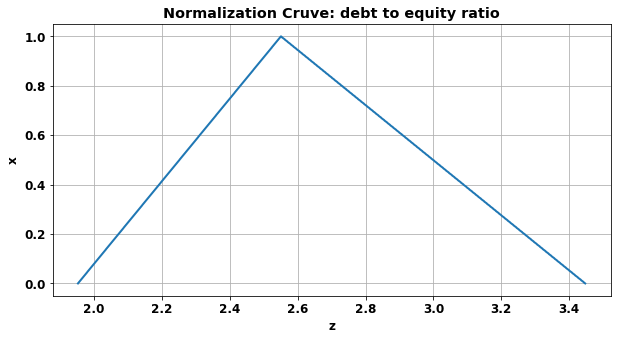

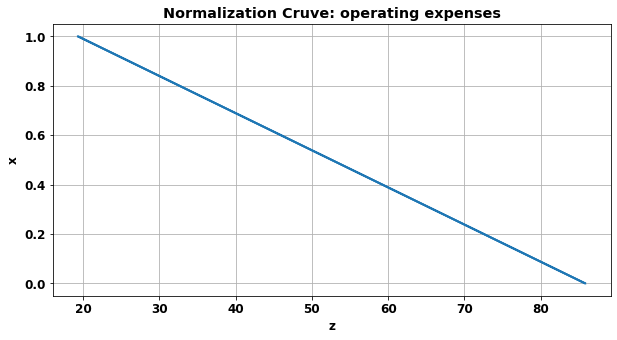

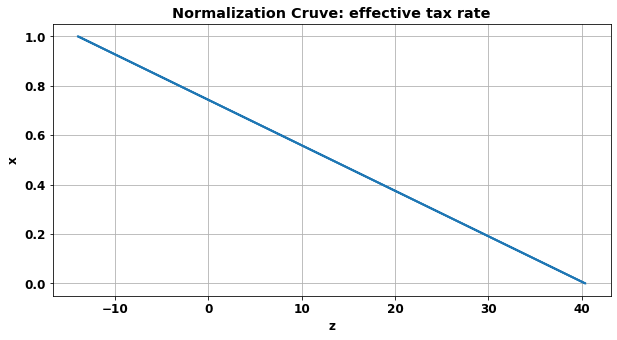

In [27]:
######################################## WEALTH - PRESSURE #############################################
#IMPORT DATA
wealth = pd.read_excel('./databases/indicator_db.xlsx', sheet_name='wealth').round(Fuzzification.nd)


#NORMALIZATION
indicators = ['debt to equity ratio','operating expenses','effective tax rate'] #CHANGE ME 
curves = []
for basic_indicator in indicators: 
    assert wealth[wealth['basic']==basic_indicator].shape[1] == 9 , 'Warning, not expected shape' #check,sensitve to number of companies, CHANGE ME
    basic_df = wealth[wealth['basic']==basic_indicator]
    iv = basic_df['intensive_value']
    discourse = np.arange(iv.min(),iv.max()+Fuzzification.dx,Fuzzification.dx)
    
    if basic_indicator == 'debt to equity ratio': #MIDDLE IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z= discourse,
                                    c_l=iv.min(),
                                    tc=iv.mean(),
                                    Tc=iv.mean(),
                                    c_u=iv.max());
        
    if basic_indicator == 'operating expenses': # LOWER IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z=discourse,
                                    c_l=iv.min(),
                                    tc=iv.min(),
                                    Tc=iv.min(),
                                    c_u=iv.max())
        
    if basic_indicator == 'effective tax rate': # LOWER IS BETTER, CHANGE ME
        x = Fuzzification.trapezoid(z=discourse,
                                    c_l=iv.min(),
                                    tc=iv.min(),
                                    Tc=iv.min(),
                                    c_u=iv.max())
    ncurve = pd.Series(data=x.round(Fuzzification.nd),
                       index=discourse.round(Fuzzification.nd),
                       name=basic_indicator)
    curves.append(ncurve)

#plotting normalization curve
for curve in curves:
    plt.figure(figsize=(10,5));plt.title('Normalization Cruve: {}'.format(curve.name));
    curve.plot(); plt.grid();plt.xlabel('z');plt.ylabel('x');
    
#FUZZIFICATION
frames = []
for curve in curves: #order of curves matters
    df_base = wealth[wealth['basic']==curve.name].drop(['raw_value','raw_value_units','intensive_units','source'],axis='columns').reset_index(drop=True) #reset index so that it concats properly
    z = df_base['intensive_value'].values
    x = curve.loc[z] # pass through normalization curve
    wms_v = wms.loc[x.values].reset_index(); #reset index to make concat work
    df_out = pd.concat([df_base,wms_v],axis='columns')
    assert df_base.shape[0] == df_out.shape[0], 'different amount of rows, error'
    frames.append(df_out)
wealth = pd.concat(frames).reset_index(drop=True)

#INFERENCE
frames2=[]
for company in wealth['company'].unique():
    frames = []
    for year in wealth['year'].unique():
        company_year = wealth[(wealth['company'] == company) &
                              (wealth['year'] == year)]

        basic_indicators = [company_year[company_year['basic']=='debt to equity ratio'].iloc[0], #CHANGE ME converted to series
                            company_year[company_year['basic']=='operating expenses'].iloc[0],
                            company_year[company_year['basic']=='effective tax rate'].iloc[0]]

        #apply inference engine
        frames.append(InferenceEngine.b3__s(basic_indicators)) #CHANGE ME
    frames2.append(pd.concat(frames,axis='columns').T)
df_pressure = pd.concat(frames2).reset_index(drop=True)

In [21]:
df_wealth = pd.concat([df_status,df_response,df_pressure],axis='index')
df_wealth

,secondary,company,year,vb,b,a,g,vg
0,status,nee,2018,0,0,1,0,0
1,status,nee,2017,0,0.53,0.45,0.02,0
2,status,nee,2016,0,0.39,0.57,0.04,0
3,status,nee,2015,0,0.39,0.61,0,0
4,status,nee,2014,0.01,0.41,0.58,0,0
5,status,duk,2018,0.09,0.72,0.19,0,0
6,status,duk,2017,0,0.51,0.4,0.08,0
7,status,duk,2016,0.23,0.65,0.11,0,0
8,status,duk,2015,0,0.56,0.39,0.05,0
9,status,duk,2014,0.34,0.57,0.08,0,0


In [ ]:
#inference to combine

df = df_wealth
######################################## WEALTH OVERALL #############################################

#NORMALIZATION
indicators = ['debt to equity ratio','operating expenses','effective tax rate'] #CHANGE ME 
def combine_3_to_1(df,indicators):
    curves = []
    for basic_indicator in indicators: 
        assert df[df['basic']==basic_indicator].shape[1] == 9 , 'Warning, not expected shape' #check,sensitve to number of companies, CHANGE ME
        basic_df = df[df['basic']==basic_indicator]
        iv = basic_df['intensive_value']
        discourse = np.arange(iv.min(),iv.max()+Fuzzification.dx,Fuzzification.dx)

        if basic_indicator == 'debt to equity ratio': #MIDDLE IS BETTER, CHANGE ME
            x = Fuzzification.trapezoid(z= discourse,
                                        c_l=iv.min(),
                                        tc=iv.mean(),
                                        Tc=iv.mean(),
                                        c_u=iv.max());

        if basic_indicator == 'operating expenses': # LOWER IS BETTER, CHANGE ME
            x = Fuzzification.trapezoid(z=discourse,
                                        c_l=iv.min(),
                                        tc=iv.min(),
                                        Tc=iv.min(),
                                        c_u=iv.max())

        if basic_indicator == 'effective tax rate': # LOWER IS BETTER, CHANGE ME
            x = Fuzzification.trapezoid(z=discourse,
                                        c_l=iv.min(),
                                        tc=iv.min(),
                                        Tc=iv.min(),
                                        c_u=iv.max())
        ncurve = pd.Series(data=x.round(Fuzzification.nd),
                           index=discourse.round(Fuzzification.nd),
                           name=basic_indicator)
        curves.append(ncurve)

    #plotting normalization curve
    for curve in curves:
        plt.figure(figsize=(10,5));plt.title('Normalization Cruve: {}'.format(curve.name));
        curve.plot(); plt.grid();plt.xlabel('z');plt.ylabel('x');

    #FUZZIFICATION
    frames = []
    for curve in curves: #order of curves matters
        df_base = df[df['basic']==curve.name].drop(['raw_value','raw_value_units','intensive_units','source'],axis='columns').reset_index(drop=True) #reset index so that it concats properly
        z = df_base['intensive_value'].values
        x = curve.loc[z] # pass through normalization curve
        wms_v = wms.loc[x.values].reset_index(); #reset index to make concat work
        df_out = pd.concat([df_base,wms_v],axis='columns')
        assert df_base.shape[0] == df_out.shape[0], 'different amount of rows, error'
        frames.append(df_out)
    df = pd.concat(frames).reset_index(drop=True)

    #INFERENCE
    frames2=[]
    for company in df['company'].unique():
        frames = []
        for year in df['year'].unique():
            company_year = df[(df['company'] == company) &
                              (df['year'] == year)]

            basic_indicators = [company_year[company_year['basic']=='debt to equity ratio'].iloc[0], #CHANGE ME converted to series
                                company_year[company_year['basic']=='operating expenses'].iloc[0],
                                company_year[company_year['basic']=='effective tax rate'].iloc[0]]

            #apply inference engine
            frames.append(InferenceEngine.b3__s(basic_indicators)) #CHANGE ME, 3-1 INFERENCE ENGINE
        frames2.append(pd.concat(frames,axis='columns').T)
    df_pressure = pd.concat(frames2).reset_index(drop=True)
    return df_pressure